In [1]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
from scipy.stats import qmc

In [2]:
LHS_seed=0

# Given parameters
nx = 60
ny = 60
m=nx*ny
tf = 3.0
dt = 5.0e-3
nt = int(tf/dt)
xmin = -1; xmax = 1
ymin = -1; ymax = 1
dims=(nx,ny)

# POD basis
num_basis=np.array([3,4,5,6])
print('num_basis {}'.format(num_basis))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_LHS_result = "../__result/ex9_advection/ex9_POD_LHS_gappy_result_LHS_seed_{}.p".format(LHS_seed)
file_name_SVD="../__model/ex9_advection/ex9_SVD.p"

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

num_basis [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


# gappyPOD

# of measurments: 12
[ 185  566  891 1177 1293 1741 1906 2240 2576 2742 3199 3375]


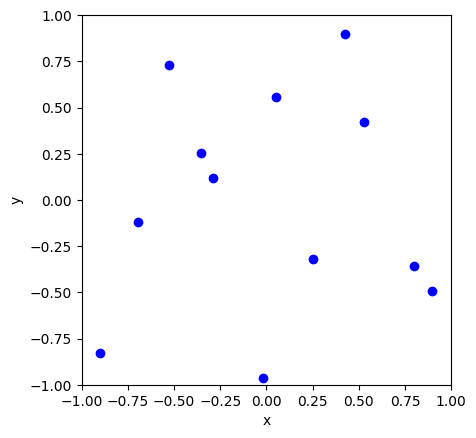

In [3]:
# LHS
num_msmt = 12
sampler = qmc.LatinHypercube(d=2,seed=LHS_seed)
sample=sampler.integers(l_bounds=[1, 1], u_bounds=[ny-1,nx-1], n=num_msmt, endpoint=False)
msmt_idx=np.sort(np.ravel_multi_index((sample[:,0],sample[:,1]),dims))

print("# of measurments: {}".format(len(msmt_idx)))
print(msmt_idx)

# plot measuremnt positions
plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
plt.axis('square')
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("../__result/ex9_advection/ex9_POD_LHS_{}_samples_LHS_seed_{}.png".format(num_msmt,LHS_seed))

# of POD basis is 3
# of measurments: 12
[ 185  566  891 1177 1293 1741 1906 2240 2576 2742 3199 3375]


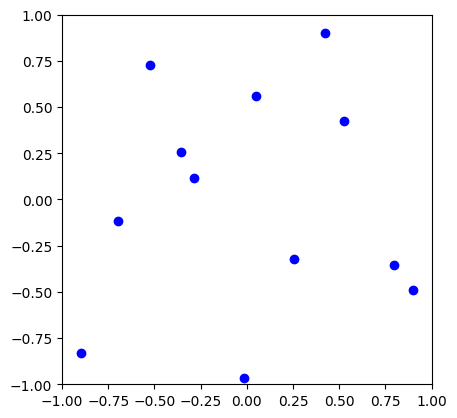

Param is 75
Time elapsed: 1.20918869972229 sec
average relative error of u: 22.376157023763255%
maximum relative error of u: 29.587827554827694%

Param is 76
Time elapsed: 1.2357041835784912 sec
average relative error of u: 22.716127084363666%
maximum relative error of u: 30.11409695481182%

Param is 77
Time elapsed: 1.2873029708862305 sec
average relative error of u: 23.054241647558772%
maximum relative error of u: 30.641139895105507%

Param is 78
Time elapsed: 1.2355444431304932 sec
average relative error of u: 23.390341471209936%
maximum relative error of u: 31.168769634560384%

Param is 79
Time elapsed: 1.3120992183685303 sec
average relative error of u: 23.724262336715913%
maximum relative error of u: 31.696973112685313%

Param is 80
Time elapsed: 1.2915549278259277 sec
average relative error of u: 24.05583156476158%
maximum relative error of u: 32.22524033589139%

Param is 81
Time elapsed: 1.2616045475006104 sec
average relative error of u: 24.384864263143037%
maximum relative er

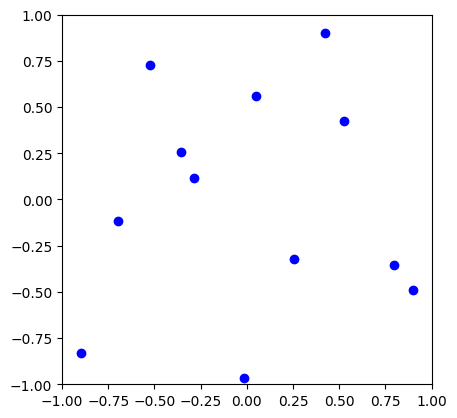

Param is 75
Time elapsed: 1.2316021919250488 sec
average relative error of u: 15.73402734232772%
maximum relative error of u: 26.30357970969992%

Param is 76
Time elapsed: 1.361039161682129 sec
average relative error of u: 15.89106206726931%
maximum relative error of u: 26.570426801106834%

Param is 77
Time elapsed: 1.3421735763549805 sec
average relative error of u: 16.042539078280722%
maximum relative error of u: 26.82807149752543%

Param is 78
Time elapsed: 1.3145332336425781 sec
average relative error of u: 16.18828640725808%
maximum relative error of u: 27.0762056091494%

Param is 79
Time elapsed: 1.346731185913086 sec
average relative error of u: 16.328138200439675%
maximum relative error of u: 27.314534766057847%

Param is 80
Time elapsed: 1.3803606033325195 sec
average relative error of u: 16.46192920418428%
maximum relative error of u: 27.54275612559569%

Param is 81
Time elapsed: 1.3744738101959229 sec
average relative error of u: 16.589497886677435%
maximum relative error of

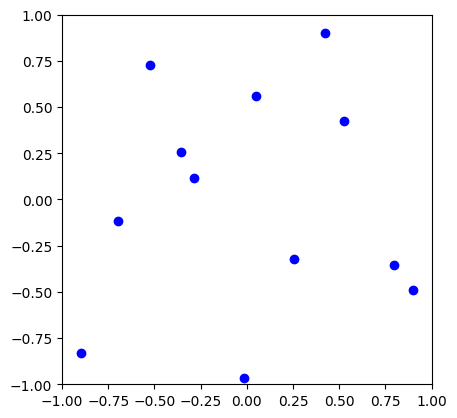

Param is 75
Time elapsed: 1.2287638187408447 sec
average relative error of u: 9.318950276266353%
maximum relative error of u: 11.321311432259606%

Param is 76
Time elapsed: 1.2952685356140137 sec
average relative error of u: 9.367475148034119%
maximum relative error of u: 11.398868439781264%

Param is 77
Time elapsed: 1.269819736480713 sec
average relative error of u: 9.410828017430259%
maximum relative error of u: 11.47130391166681%

Param is 78
Time elapsed: 1.2567918300628662 sec
average relative error of u: 9.448924298484375%
maximum relative error of u: 11.538572496281294%

Param is 79
Time elapsed: 1.2648677825927734 sec
average relative error of u: 9.481693660843492%
maximum relative error of u: 11.600606615116513%

Param is 80
Time elapsed: 1.3193213939666748 sec
average relative error of u: 9.509073617325912%
maximum relative error of u: 11.657401324065628%

Param is 81
Time elapsed: 1.294001579284668 sec
average relative error of u: 9.53101698298502%
maximum relative error of

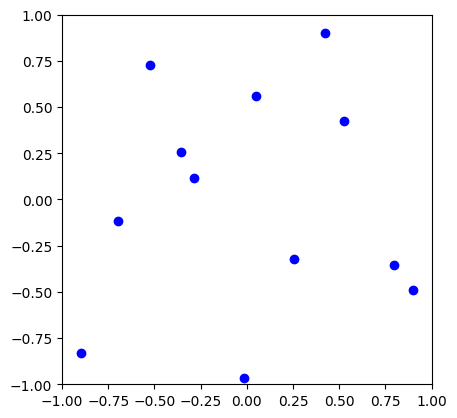

Param is 75
Time elapsed: 1.227614402770996 sec
average relative error of u: 8.59784058192226%
maximum relative error of u: 10.752995437711395%

Param is 76
Time elapsed: 1.2630641460418701 sec
average relative error of u: 8.60810650722889%
maximum relative error of u: 10.773191532578464%

Param is 77
Time elapsed: 1.2724676132202148 sec
average relative error of u: 8.6126928724516%
maximum relative error of u: 10.787167620105686%

Param is 78
Time elapsed: 1.2194523811340332 sec
average relative error of u: 8.611593224820966%
maximum relative error of u: 10.794992957692658%

Param is 79
Time elapsed: 1.2407121658325195 sec
average relative error of u: 8.6048167725817%
maximum relative error of u: 10.79663509491421%

Param is 80
Time elapsed: 1.2421331405639648 sec
average relative error of u: 8.5923943554705%
maximum relative error of u: 10.79216091321855%

Param is 81
Time elapsed: 1.2461838722229004 sec
average relative error of u: 8.57437785882209%
maximum relative error of u: 10.7

In [4]:
solution=np.zeros((len(num_basis),len(FOM_parameters),nt+1,nx*ny))
avg_rel_err=np.zeros((len(num_basis),len(FOM_parameters)))
rel_err=np.zeros((len(num_basis),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(num_basis),len(FOM_parameters)))

with open(file=file_name_SVD, mode='rb') as ff:  
    SVD = pickle.load(ff)

for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    print("# of POD basis is {}".format(POD_basis))
    
    # LHS
    num_msmt = 12
    sampler = qmc.LatinHypercube(d=2,seed=LHS_seed)
    sample=sampler.integers(l_bounds=[1, 1], u_bounds=[ny-1,nx-1], n=num_msmt, endpoint=False)
    msmt_idx=np.sort(np.ravel_multi_index((sample[:,0],sample[:,1]),dims))

    print("# of measurments: {}".format(len(msmt_idx)))
    print(msmt_idx)

    # plot measuremnt positions
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.show()
    
    # Basis matrix
    phi_u = SVD['U'][:,:POD_basis]

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex9_advection/ex9_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))
        print()

        # save result
        solution[ii,jj]=u_gappyPOD
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyPOD
        elapsed_time[ii,jj]=t_elapsed_gappyPOD
    
results={'solution':solution,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_LHS_result, mode='wb') as ff:
    pickle.dump(results, ff)

In [5]:
print(num_basis)
idx=[0,1,2,3]
num_basis[idx]

[3 4 5 6]


array([3, 4, 5, 6])

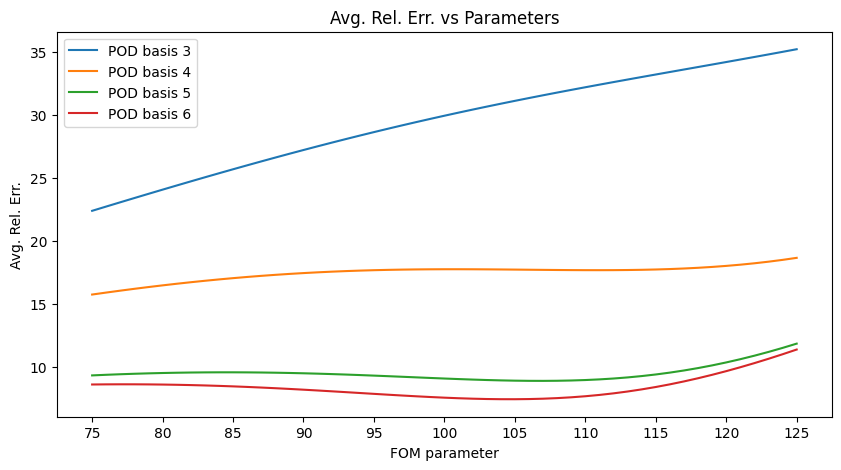

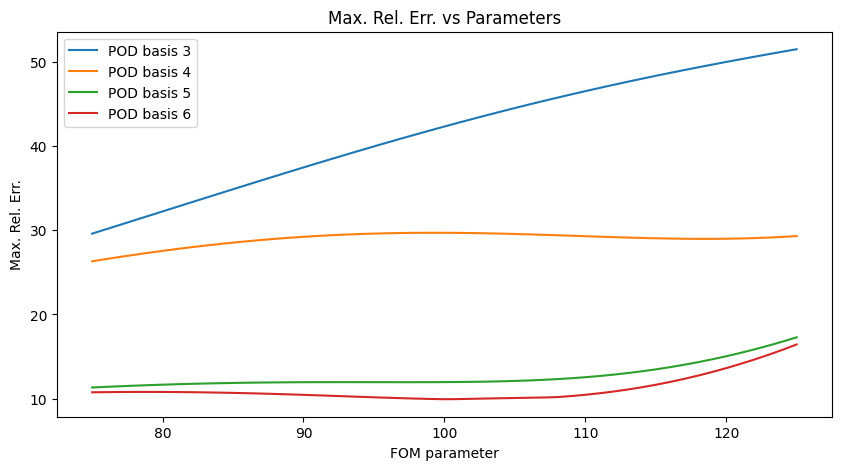

In [6]:
# with open(file=file_path_gappy_LHS_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_LHS_avg_rel_err.png")

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_LHS_max_rel_err.png")

In [11]:
idx=[3]
num_basis[idx]

array([6])

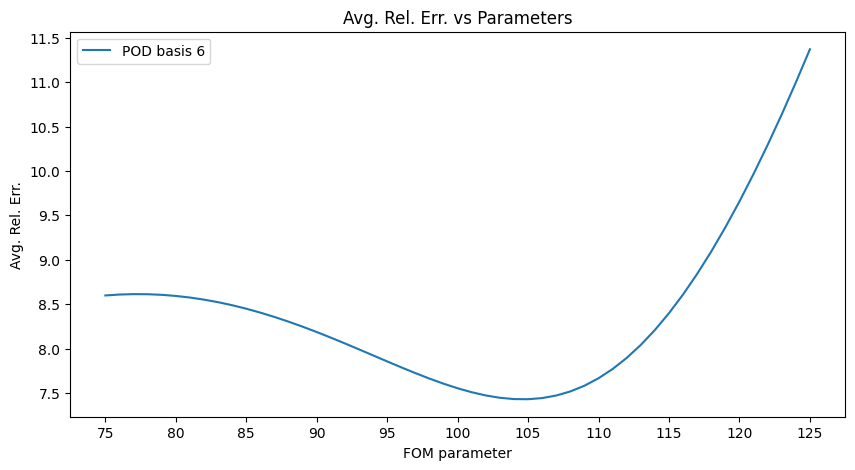

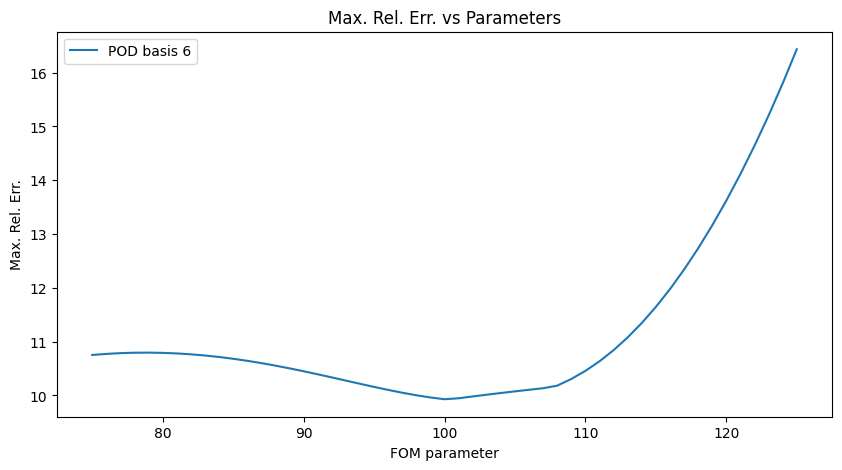

In [12]:
# with open(file=file_path_gappy_LHS_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_LHS_avg_rel_err.png".format(int(num_basis[idx])))

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_LHS_max_rel_err.png".format(int(num_basis[idx])))

In [13]:
print(num_basis)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


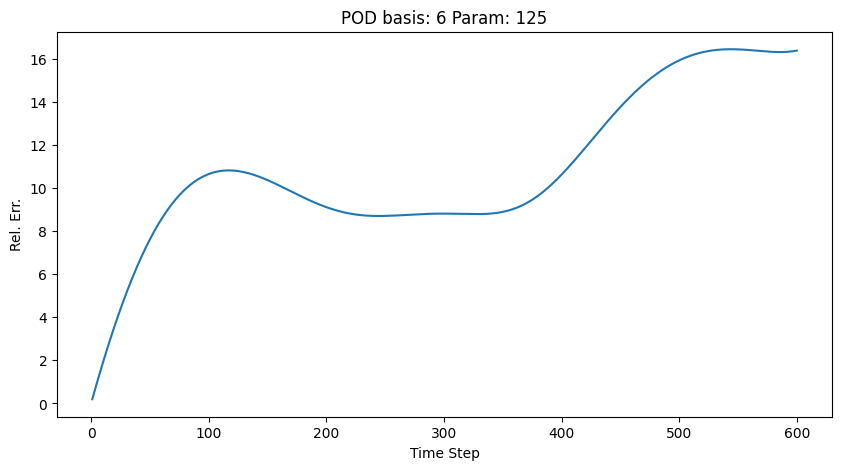

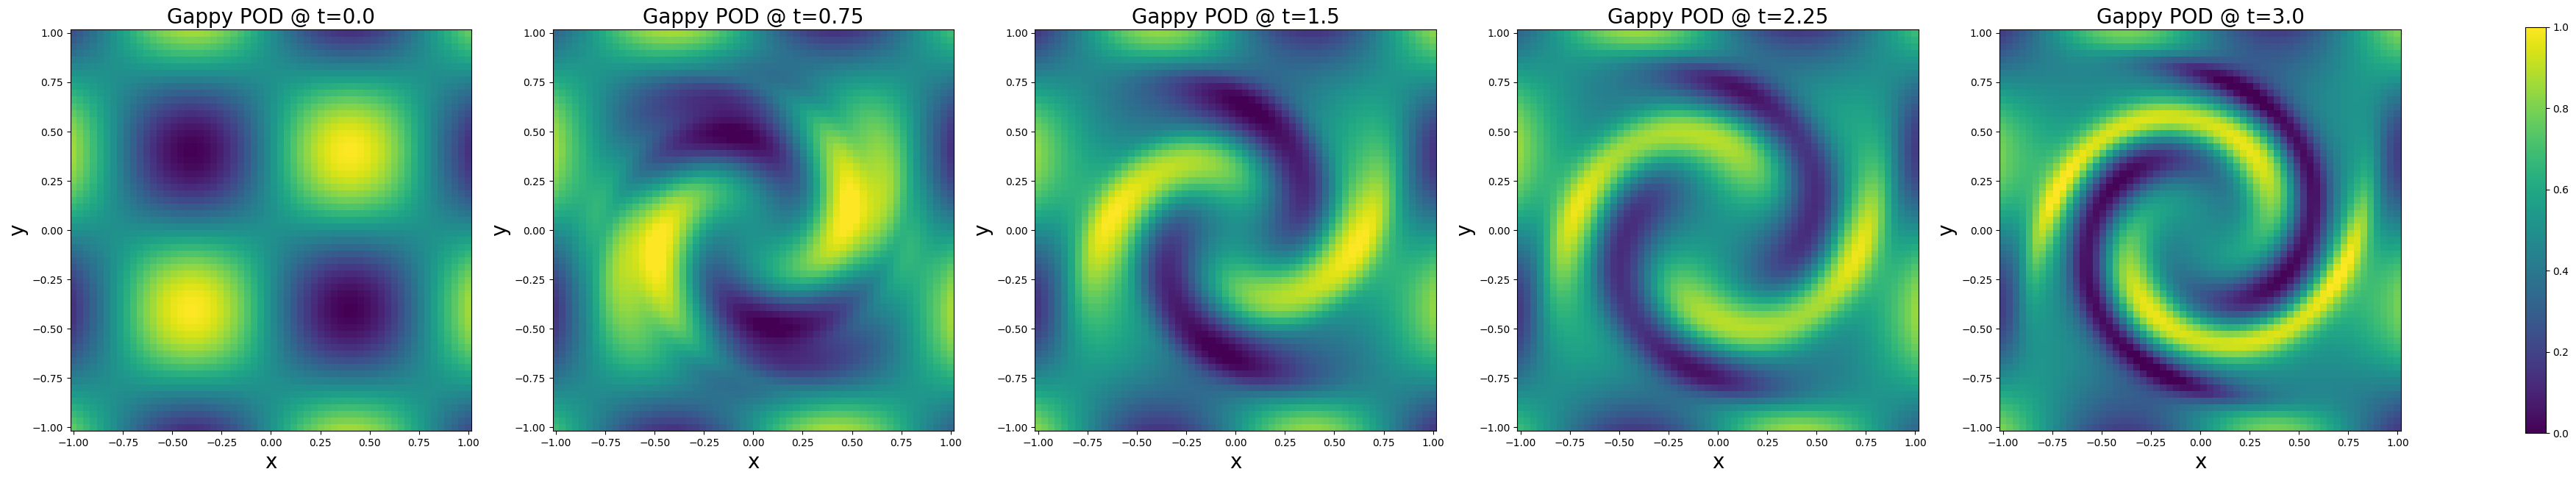

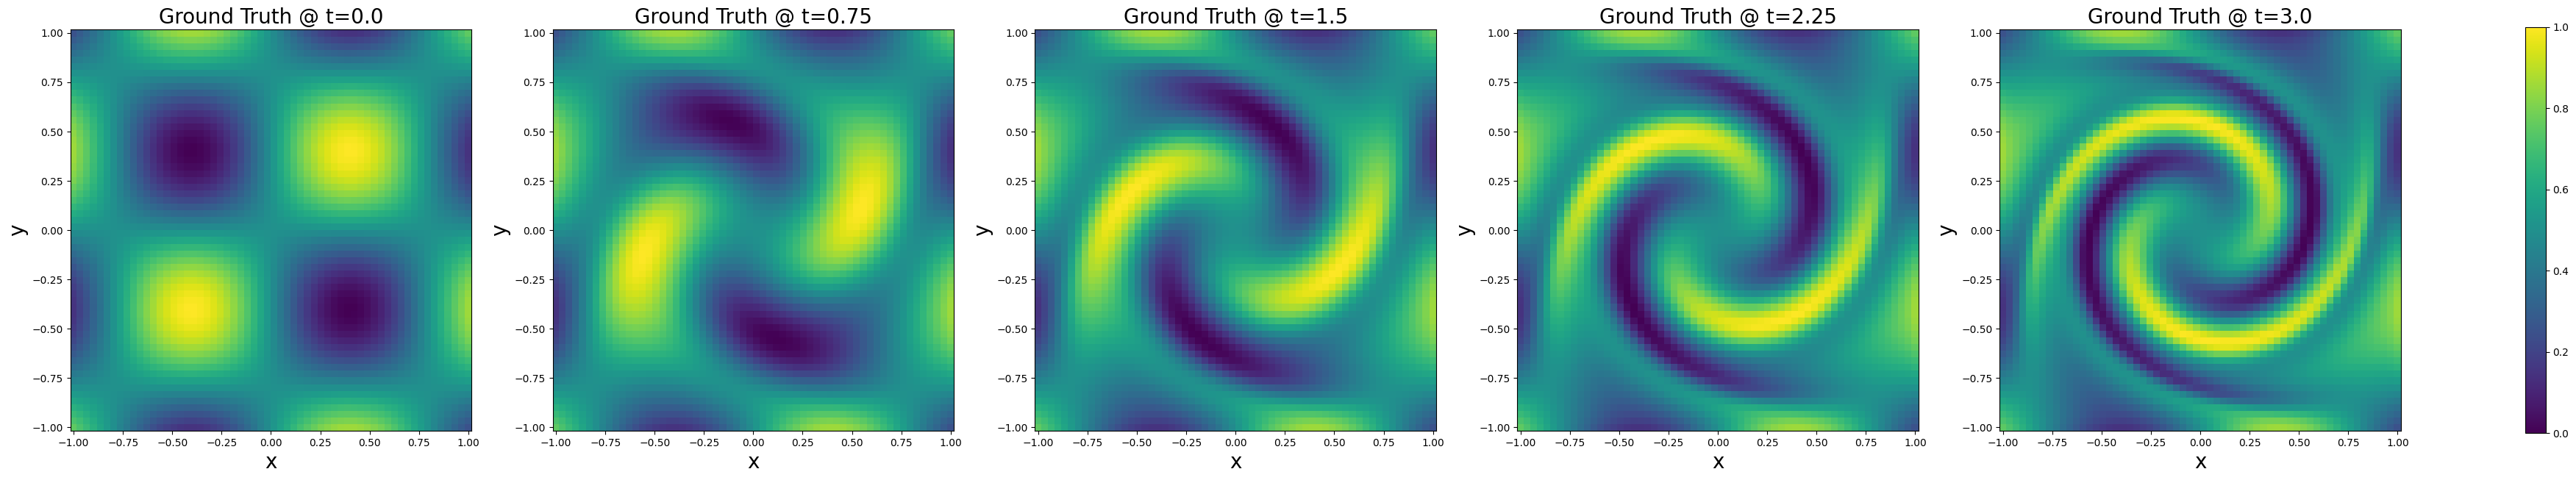

In [14]:
# figure rel.err vs at given param and POD basis
i=3;j=-1
POD_basis=num_basis[i]                 
param=FOM_parameters[j]

u_gappyPOD=results['solution'][i,j]

ex = np.load('../__data/ex9_advection/ex9_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("POD basis: {} Param: {}".format(POD_basis,param))
plt.show()

# plot original data
vmin=0; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_SOL.png".format(POD_basis))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex9_advection/ex9_ground_truth.png")